# **Bike Price Prediction Using Linear Regression**

**Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**Import Data**

In [2]:
df = pd.read_csv("updated_dataset.csv")

**Explore Data**

In [3]:
df.head()

,Brand,Model,Selling_Price,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
0,TVS,TVS XL 100,30000,2017,Individual,1st owner,8000,30490.0
1,Bajaj,Bajaj ct 100,18000,2017,Individual,1st owner,35000,32000.0
2,Yo,Yo Style,20000,2011,Individual,1st owner,10000,37675.0
3,Bajaj,Bajaj Discover 100,25000,2010,Individual,1st owner,43000,42859.0
4,Bajaj,Bajaj Discover 100,24999,2012,Individual,2nd owner,35000,42859.0


In [4]:
df.shape

(1061, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              1061 non-null   object 
 1   Model              1061 non-null   object 
 2   Selling_Price      1061 non-null   int64  
 3   Year               1061 non-null   int64  
 4   Seller_Type        1061 non-null   object 
 5   Owner              1061 non-null   object 
 6   KM_Driven          1061 non-null   int64  
 7   Ex_Showroom_Price  1056 non-null   float64
dtypes: float64(1), int64(3), object(4)
memory usage: 66.4+ KB


In [6]:
df.describe()

,Selling_Price,Year,KM_Driven,Ex_Showroom_Price
count,1061.000000,1061.000000,1061.000000,1.056000e+03
mean,59638.151744,2013.867107,34359.833176,8.400841e+04
std,56304.291973,4.301191,51623.152702,6.279478e+04
min,5000.000000,1988.000000,350.000000,3.049000e+04
25%,28000.000000,2011.000000,13500.000000,5.460500e+04
50%,45000.000000,2015.000000,25000.000000,7.414350e+04
75%,70000.000000,2017.000000,43000.000000,9.400000e+04
max,760000.000000,2020.000000,880000.000000,1.278000e+06


In [7]:
df.dtypes

Brand                 object
Model                 object
Selling_Price          int64
Year                   int64
Seller_Type           object
Owner                 object
KM_Driven              int64
Ex_Showroom_Price    float64
dtype: object

In [8]:
df.isnull().sum()

Brand                0
Model                0
Selling_Price        0
Year                 0
Seller_Type          0
Owner                0
KM_Driven            0
Ex_Showroom_Price    5
dtype: int64

**Identifying and Removing Missing Values**

In [9]:
df.isnull()

,Brand,Model,Selling_Price,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
1056,False,False,False,False,False,False,False,True
1057,False,False,False,False,False,False,False,True
1058,False,False,False,False,False,False,False,True
1059,False,False,False,False,False,False,False,True


In [10]:
df["Ex_Showroom_Price"].fillna(df["Ex_Showroom_Price"].median(), inplace=True)

In [11]:
df.isnull()

,Brand,Model,Selling_Price,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
1056,False,False,False,False,False,False,False,False
1057,False,False,False,False,False,False,False,False
1058,False,False,False,False,False,False,False,False
1059,False,False,False,False,False,False,False,False


In [12]:
df.isnull().sum()

Brand                0
Model                0
Selling_Price        0
Year                 0
Seller_Type          0
Owner                0
KM_Driven            0
Ex_Showroom_Price    0
dtype: int64

**Features**

In [13]:
df['Bike_Age'] = 2025 - df['Year']
df.drop('Year', axis=1, inplace=True)


In [14]:
for c in ["Brand","Model","Owner","Seller_Type"]:
    v=df[c].value_counts()
    print(v)

Bajaj       260
Hero        232
Honda       204
Royal       109
Yamaha      102
TVS          69
Suzuki       30
KTM          24
Mahindra      6
Vespa         4
Kawasaki      4
Activa        3
UM            3
Jawa          3
Harley        2
Aprilia       2
Yo            1
Benelli       1
Hyosung       1
BMW           1
Name: Brand, dtype: int64
Bajaj Pulsar 150             41
Royal Enfield Classic 350    27
Honda Activa [2000-2015]     23
Honda CB Hornet 160R         22
Bajaj Pulsar 180             20
                             ..
Suzuki Gixxer SF Fi           1
Bajaj Pulsar  NS 200          1
Hero Xpulse 200T              1
Yamaha Fazer                  1
TVS Max DLX                   1
Name: Model, Length: 279, dtype: int64
1st owner    924
2nd owner    123
3rd owner     11
4th owner      3
Name: Owner, dtype: int64
Individual    1055
Dealer           6
Name: Seller_Type, dtype: int64


**Data Preprocessing**

In [15]:
df.head()

,Brand,Model,Selling_Price,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price,Bike_Age
0,TVS,TVS XL 100,30000,Individual,1st owner,8000,30490.0,8
1,Bajaj,Bajaj ct 100,18000,Individual,1st owner,35000,32000.0,8
2,Yo,Yo Style,20000,Individual,1st owner,10000,37675.0,14
3,Bajaj,Bajaj Discover 100,25000,Individual,1st owner,43000,42859.0,15
4,Bajaj,Bajaj Discover 100,24999,Individual,2nd owner,35000,42859.0,13


In [16]:
numeric_cols=["KM_Driven","Ex_Showroom_Price","Bike_Age","Selling_Price"]
print(numeric_cols)
cat_cols=["Brand","Model","Seller_Type","Owner"]
print(cat_cols)

['KM_Driven', 'Ex_Showroom_Price', 'Bike_Age', 'Selling_Price']
['Brand', 'Model', 'Seller_Type', 'Owner']


**Outlier Visualization**

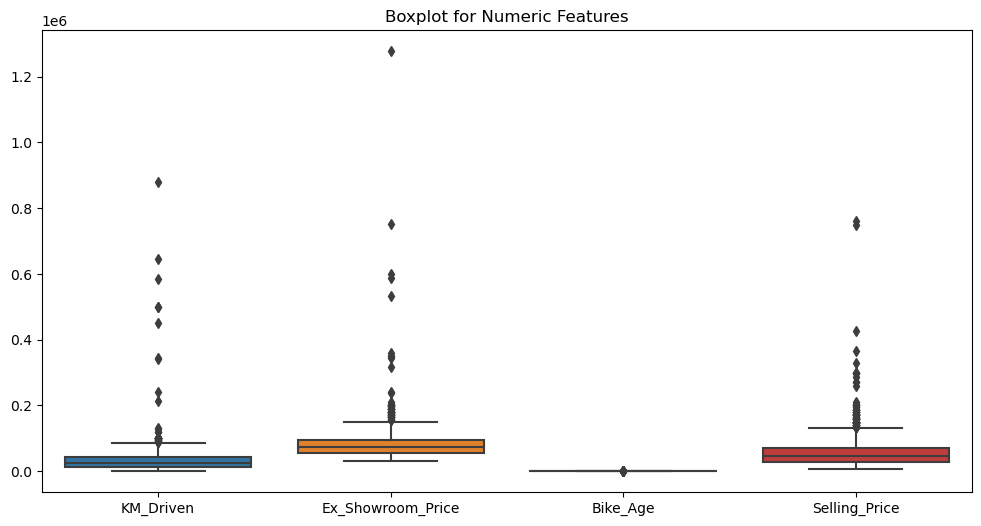

In [17]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df[numeric_cols])
plt.title("Boxplot for Numeric Features")
plt.show()

In [18]:
df1 = df.copy()
df1.shape

(1061, 8)

**Identifying and Handling Outliers**

In [19]:
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1 
    lb= Q1 - 1.5 * IQR
    ub= Q3 + 1.5 * IQR
    df.loc[df[col]>ub,col]=ub

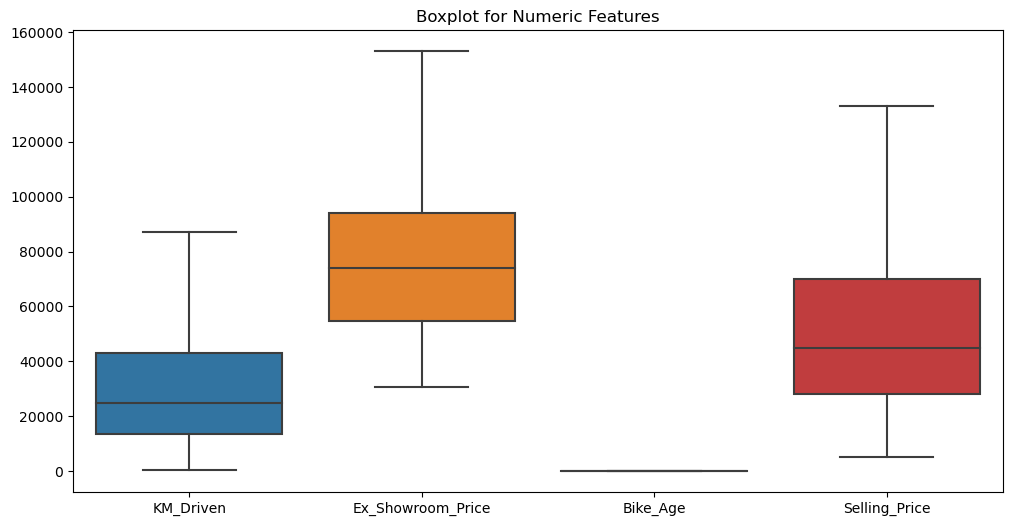

In [20]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df[numeric_cols])
plt.title("Boxplot for Numeric Features")
plt.show()

**Data Visualization**

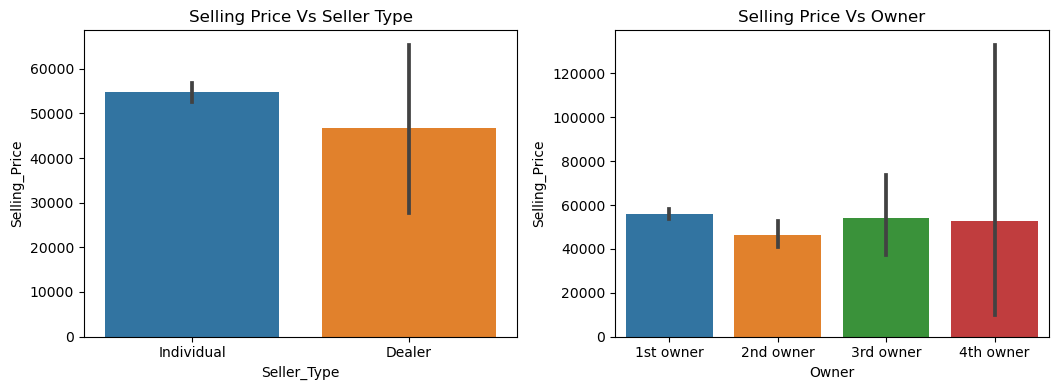

In [21]:
plt.figure(figsize=[16,4])
plt.subplot(1,3,1)
sns.barplot(x='Seller_Type', y='Selling_Price', data=df)
plt.title('Selling Price Vs Seller Type')

plt.subplot(1,3,2)
sns.barplot(x='Owner', y='Selling_Price', data=df)
plt.title('Selling Price Vs Owner')

plt.tight_layout()
plt.show()

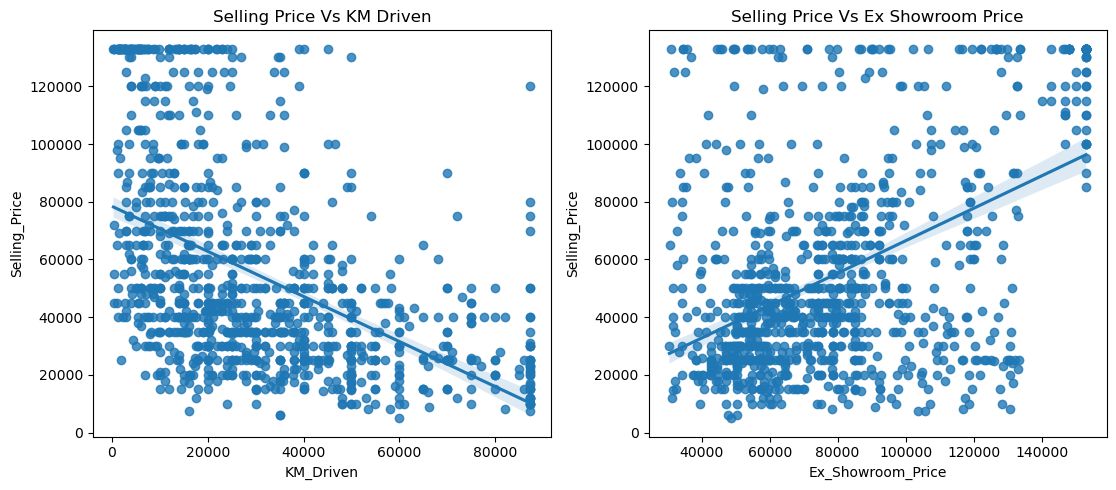

In [22]:
plt.figure(figsize=[16,5])
plt.subplot(1,3,2)
sns.regplot(x='KM_Driven', y='Selling_Price', data=df)
plt.title('Selling Price Vs KM Driven')

plt.subplot(1,3,3)
sns.regplot(x='Ex_Showroom_Price', y='Selling_Price', data=df)
plt.title('Selling Price Vs Ex Showroom Price')

plt.tight_layout()
plt.show()

**Skewness Handling**

In [23]:
df.head()

,Brand,Model,Selling_Price,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price,Bike_Age
0,TVS,TVS XL 100,30000,Individual,1st owner,8000,30490.0,8
1,Bajaj,Bajaj ct 100,18000,Individual,1st owner,35000,32000.0,8
2,Yo,Yo Style,20000,Individual,1st owner,10000,37675.0,14
3,Bajaj,Bajaj Discover 100,25000,Individual,1st owner,43000,42859.0,15
4,Bajaj,Bajaj Discover 100,24999,Individual,2nd owner,35000,42859.0,13


In [24]:
skewness_values = df[numeric_cols].skew()
skewness_values

KM_Driven            0.908112
Ex_Showroom_Price    0.865296
Bike_Age             0.893624
Selling_Price        1.012130
dtype: float64

In [25]:
cols = ['KM_Driven', 'Ex_Showroom_Price','Bike_Age']
for col in cols:
    df[col] = np.log1p(df[col])

In [26]:
df['KM_Driven'] = pd.qcut(df['KM_Driven'], 5, labels=False)

In [27]:
skewness_values = df[cols].skew()
skewness_values

KM_Driven            0.040672
Ex_Showroom_Price    0.139901
Bike_Age             0.290634
dtype: float64

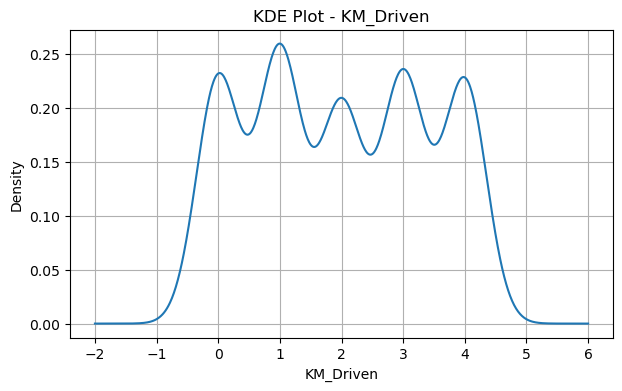

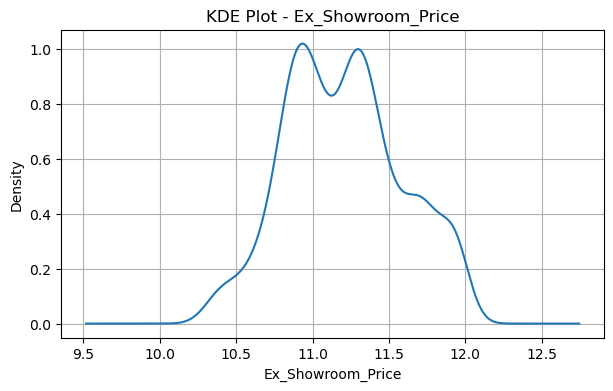

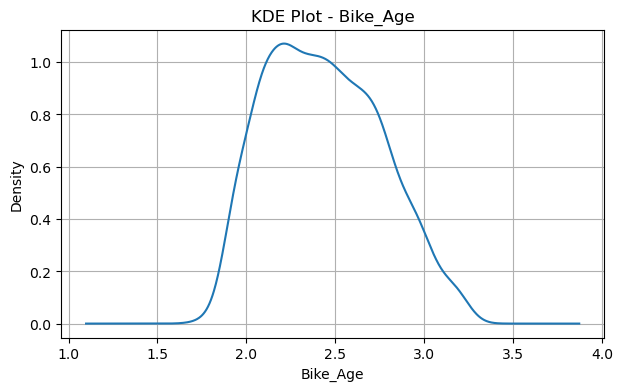

In [28]:
for col in cols:
    plt.figure(figsize=(7,4))
    df[col].plot(kind='kde')
    plt.title(f"KDE Plot - {col}")
    plt.xlabel(col)
    plt.grid(True)
    plt.show()

**Correlation Visualization**

In [29]:
corr_matrix = df.corr()
corr_matrix

,Selling_Price,KM_Driven,Ex_Showroom_Price,Bike_Age
Selling_Price,1.000000,-0.514424,0.424683,-0.598474
KM_Driven,-0.514424,1.000000,-0.124247,0.544366
Ex_Showroom_Price,0.424683,-0.124247,1.000000,-0.093242
Bike_Age,-0.598474,0.544366,-0.093242,1.000000


<AxesSubplot:>

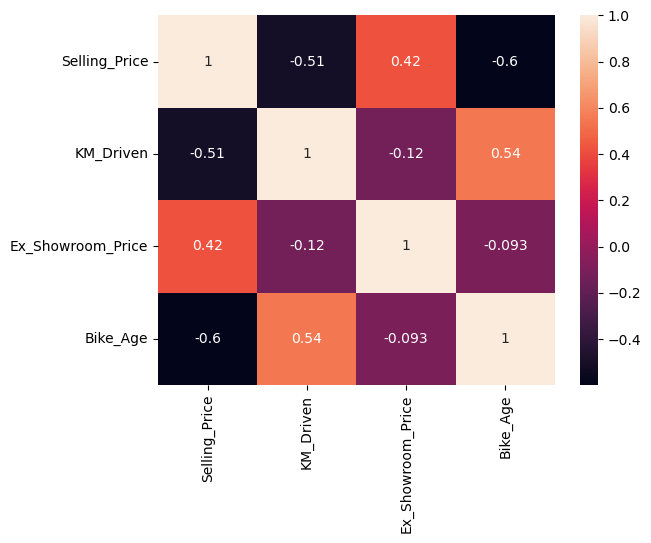

In [30]:
sns.heatmap(corr_matrix, annot=True)

**Encoding of Categorical Features**

In [31]:
df.columns

Index(['Brand', 'Model', 'Selling_Price', 'Seller_Type', 'Owner', 'KM_Driven',
       'Ex_Showroom_Price', 'Bike_Age'],
      dtype='object')

In [32]:
from sklearn.preprocessing import LabelEncoder

brand_encoder = LabelEncoder()
model_encoder = LabelEncoder()

df['Brand'] = brand_encoder.fit_transform(df['Brand'])
df['Model'] = model_encoder.fit_transform(df['Model'])

print("Brand Mapping:")
print(dict(zip(brand_encoder.classes_, brand_encoder.transform(brand_encoder.classes_))))

print("Model Mapping:")
print(dict(zip(model_encoder.classes_, model_encoder.transform(model_encoder.classes_))))


Brand Mapping:
{'Activa': 0, 'Aprilia': 1, 'BMW': 2, 'Bajaj': 3, 'Benelli': 4, 'Harley': 5, 'Hero': 6, 'Honda': 7, 'Hyosung': 8, 'Jawa': 9, 'KTM': 10, 'Kawasaki': 11, 'Mahindra': 12, 'Royal': 13, 'Suzuki': 14, 'TVS': 15, 'UM': 16, 'Vespa': 17, 'Yamaha': 18, 'Yo': 19}
Model Mapping:
{'Activa 3g': 0, 'Activa 4g': 1, 'Aprilia SR 125': 2, 'BMW G310GS': 3, 'Bajaj  ct 100': 4, 'Bajaj Avenger 150': 5, 'Bajaj Avenger 150 street': 6, 'Bajaj Avenger 220': 7, 'Bajaj Avenger 220 dtsi': 8, 'Bajaj Avenger Cruise 220': 9, 'Bajaj Avenger Street 150 [2018]': 10, 'Bajaj Avenger Street 160': 11, 'Bajaj Avenger Street 220': 12, 'Bajaj Avenger [2015]': 13, 'Bajaj Boxer': 14, 'Bajaj CT 100': 15, 'Bajaj CT 110': 16, 'Bajaj Discover 100': 17, 'Bajaj Discover 100 M': 18, 'Bajaj Discover 100 T': 19, 'Bajaj Discover 110': 20, 'Bajaj Discover 125': 21, 'Bajaj Discover 125 M': 22, 'Bajaj Discover 125 ST': 23, 'Bajaj Discover 135': 24, 'Bajaj Discover 150': 25, 'Bajaj Discover 150F': 26, 'Bajaj Discover 150S': 27, 

In [33]:
le = LabelEncoder()
for col in ["Seller_Type","Owner"]:
    df[col] = le.fit_transform(df[col].astype(str))

In [34]:
df["Seller_Type"].value_counts()

1    1055
0       6
Name: Seller_Type, dtype: int64

**Train Test Split**

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
Y = df['Selling_Price']
X = df.drop(['Selling_Price'], axis=1)

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [38]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((742, 7), (319, 7), (742,), (319,))

# Modelling

**LinearRegression** 

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
model = LinearRegression()

In [41]:
model.fit(X_train, Y_train)

LinearRegression()

In [42]:
df.head()

,Brand,Model,Selling_Price,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price,Bike_Age
0,15,239,30000,1,0,0,10.325187,2.197225
1,3,4,18000,1,0,3,10.373522,2.197225
2,19,278,20000,1,0,0,10.536779,2.708050
3,3,17,25000,1,0,3,10.665694,2.772589
4,3,17,24999,1,1,3,10.665694,2.639057


**Prediction**

In [43]:
Y_pred = model.predict(X_test)

In [44]:
Y_pred

array([ 52487.98067549,  81947.75462274,  93867.06419634,  35685.91623028,
        45343.08117139, 111167.78935039,  -1342.49967651,  93005.07602241,
        41929.12777135,  -6167.96769235,  36149.37991351,  65601.54036765,
         5502.60980589,  57398.32383056,  28901.75520843,  32748.47576697,
        42866.58741431,  61318.56909689,  21182.21476574,  21723.46815265,
        37549.55505374,  47574.07664949,  13671.97030857,  47755.95616628,
        42219.14592601,  89913.59098796,  21255.07267022,  19370.39982957,
        44316.30097938,  52949.56355767,  59695.33549258,  52621.34960514,
       -12428.60371658,  21848.64233989,  23818.22023239,  46790.31565356,
        60382.81606479,  24855.77305906,  37872.6185236 ,  75477.1728495 ,
        83167.24016175,  29267.54044217,  46088.9309746 ,  96507.00257299,
        66903.811606  ,  30806.25727645,  77638.9574684 ,  45004.9504086 ,
        52838.18635497,  45801.83434548,  19115.94302733,   8664.90300563,
        47955.86130384,  

**Model Evaluation**

In [45]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [46]:
MSE = mean_squared_error(Y_test, Y_pred)
print('Test Mean Squared Error for test data: ', MSE)

Test Mean Squared Error for test data:  570807955.1661712


In [47]:
MAE = mean_absolute_error(Y_test, Y_pred)
print('Test Mean Absolute Error for test data: ', MAE)

Test Mean Absolute Error for test data:  17922.16129701309


In [48]:
R2 = r2_score(Y_test, Y_pred)
print('Test R2 Score for test data: ', R2)

Test R2 Score for test data:  0.5461136519917962


**Accuracy of training data**

In [49]:
X_pred = model.predict(X_train)
MSE = mean_squared_error(Y_train, X_pred)
print('Train Mean Squared Error for test data: ', MSE)

Train Mean Squared Error for test data:  533795235.9773902


In [50]:
MAE = mean_absolute_error(Y_train, X_pred)
print('Train Mean Absolute Error for test data: ', MAE)

Train Mean Absolute Error for test data:  17784.481598170973


In [51]:
R2_ = r2_score(Y_train, X_pred)
print('Train R2 Score for test data: ', R2_)

Train R2 Score for test data:  0.5767104219768321


**Scaling Technique**

In [52]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Random Forest + GridSearchCV**

In [53]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error

In [54]:
rf = RandomForestRegressor(random_state=42)

param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 5, 10, 15],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ['auto', 'sqrt', 'log2']}

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,
    scoring='r2',
    n_jobs=-1,
    verbose=2)

In [55]:
grid_search.fit(X_train_scaled, Y_train)

best_rf = grid_search.best_estimator_
print("Best Random Forest Params:", grid_search.best_params_)

Fitting 3 folds for each of 324 candidates, totalling 972 fits
Best Random Forest Params: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [56]:
y_train_pred_rf = best_rf.predict(X_train_scaled)
y_test_pred_rf = best_rf.predict(X_test_scaled)

**Evaluation**

In [57]:
print("Random Forest - Training R2:", r2_score(Y_train, y_train_pred_rf))
print("Random Forest - Training MAE:", mean_absolute_error(Y_train, y_train_pred_rf))
print("Random Forest - Testing R2:", r2_score(Y_test, y_test_pred_rf))
print("Random Forest - Testing MAE:", mean_absolute_error(Y_test, y_test_pred_rf))


Random Forest - Training R2: 0.9594693095597266
Random Forest - Training MAE: 5497.482732822452
Random Forest - Testing R2: 0.8575373598456781
Random Forest - Testing MAE: 9947.882905996252


**XGBoost+RandomizedSearchCV**

In [58]:
!pip install xgboost

In [59]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

In [60]:
param_dist = {
    'n_estimators': np.arange(100, 501, 50),
    'max_depth': [3, 5, 7, 10, 15],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.7, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 1.0],
    'min_child_weight': [1, 3, 5, 7]}

random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=50,     
    scoring='r2',
    cv=5,
    verbose=2,
    n_jobs=-1,
    random_state=42)

In [61]:
random_search.fit(X_train_scaled, Y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
         

In [62]:
random_search.fit(X_train_scaled, Y_train)

best_xgb = random_search.best_estimator_
print("Best XGBoost Params:", random_search.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best XGBoost Params: {'subsample': 0.7, 'n_estimators': 250, 'min_child_weight': 3, 'max_depth': 3, 'learning_rate': 0.05, 'colsample_bytree': 0.6}


**Evaluation**

In [63]:
y_train_pred = best_xgb.predict(X_train_scaled)
y_test_pred = best_xgb.predict(X_test_scaled)

print("XGBoost - Training R2:", r2_score(Y_train, y_train_pred))
print("XGBoost - Training MAE:", mean_absolute_error(Y_train, y_train_pred))
print("XGBoost - Testing R2:", r2_score(Y_test, y_test_pred))
print("XGBoost - Testing MAE:", mean_absolute_error(Y_test, y_test_pred))


XGBoost - Training R2: 0.915911727835222
XGBoost - Training MAE: 7819.8671605194995
XGBoost - Testing R2: 0.8402354855737557
XGBoost - Testing MAE: 10289.263200431034


     Actual      Predicted
31    28000   42140.464844
413   40000   52423.648438
535   75000   86158.398438
743   20000   22571.244141
792   30000   45223.839844
568  133000  131601.562500
720   15000   18449.679688
578  133000  119944.882812
86    35000   34091.050781
644   25000   20839.287109


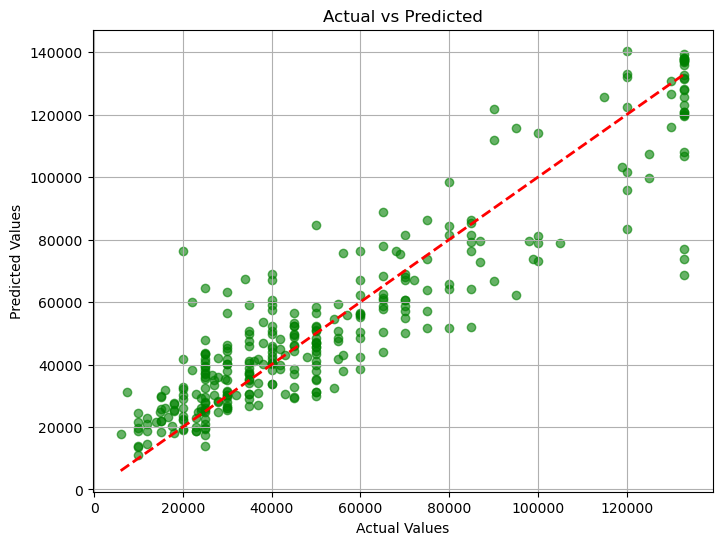

In [64]:
test_comparison = pd.DataFrame({
    "Actual": Y_test,
    "Predicted": y_test_pred
})

print(test_comparison.head(10))  


plt.figure(figsize=(8,6))
plt.scatter(Y_test, y_test_pred, alpha=0.6, color='green')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.grid(True)
plt.show()

     Actual      Predicted
346   45000   42236.230469
5     20000   22723.480469
310   45000   38888.238281
499   52000   39460.738281
104   42000   35586.359375
97    28000   31894.931641
332   25000   32083.429688
457   72000   73523.875000
314   50000   44908.222656
622  133000  106122.000000


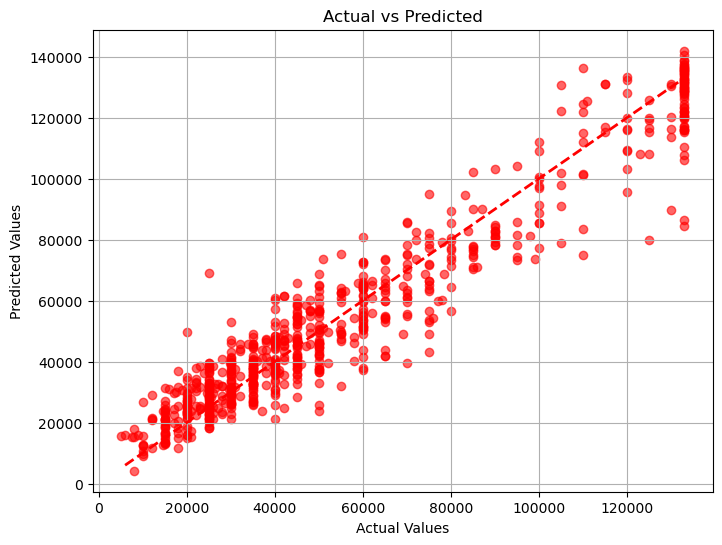

In [65]:
train_comparison = pd.DataFrame({
    "Actual": Y_train,
    "Predicted": y_train_pred
})

print(train_comparison.head(10))  


plt.figure(figsize=(8,6))
plt.scatter(Y_train, y_train_pred, alpha=0.6, color='red')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.grid(True)
plt.show()

In [66]:
import pickle
pickle.dump(model, open("model.pkl", "wb"))